<a href="https://colab.research.google.com/github/Teoroo-CMC/DoE_Course_Material/blob/main/Week_1/Workshop_2/Plotting_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting in Python using Matplotlib and Seaborn

### Disclaimer: 

The whole Seaborn-part of this Jupyter notebook tutorial has been downloaded from the github page: 

https://github.com/Pitsillides91/Python-Tutorials/tree/master/Seaborn%20Tutorial

Very minor changes have been made in the data-loading part (because that is folder-specific), but the rest has been kept intact.

**The notebook author has 3 20-minute videos on Youtube where he goes through all of these cells and explains everything, so those of you who are interested can watch the videos since they are very informative! (Not sponsored :) )**

The link to part 1 is: https://www.youtube.com/watch?v=Pkvdc2Z6eBg&list=PLagzZ8RIKbFCdjs4pZZoMikTcmFjTIiVS&index=10

# Plotting using Matplotlib, Seaborn and Plotly

Matplotlib lets users create highly custimizable plots and plot templates that are easily reproducible. The images it renders are also of high quality, since it represents objects on a plot as mathematical objects, not as pixels (it works kind of like vector images). Actually, the figures generated in a lot of publications are used using Matplotlib.

A number of plotting tools build on Matplotlib and trade costumizability against less verbose code. 
One of those is the Seaborn library, which will be covered later in this notebook. Seaborn is an "extension" to Matplotlib which is easy to integrate with Pandas DataFrames. It is up to you however wether you want to use seaborn or matplotlib directly. 

# Python Matplotlib Tutorial

In [39]:
import numpy as np # Now Numpy can be accessed via np.<name of variable or function to use>
import matplotlib.pyplot as plt # Now the Pyplot module of Matplotlib can be accessed via plt.<name of variable or function to use>
import plotly

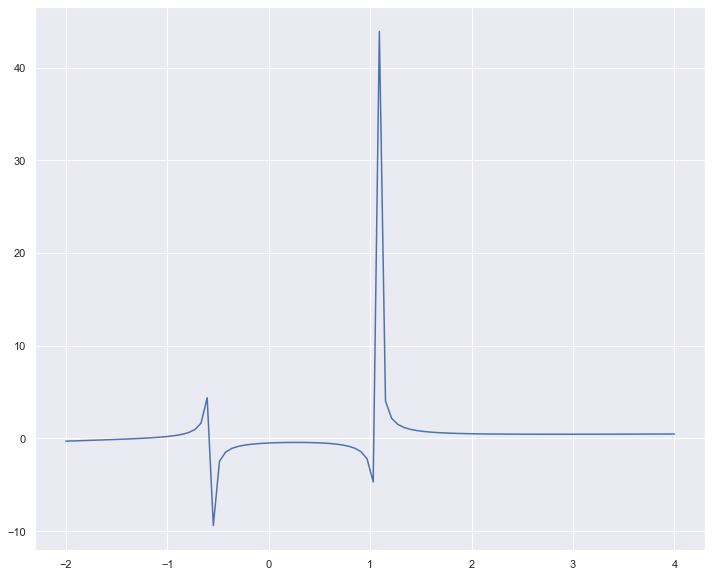

In [40]:
# Easy way to plot data

# First a short Python functions recap
def func(x):
    
    """y = (x^3+2)/(x^3+6x^2-4x-4)"""
    
        
    return (x**3+2)/(x**3+6*x**2-4*x-4)
    
x = np.linspace(-2,4,100) # Take 50 numbers between 1 and 10 as x
y = func(x) # Calculate y

# The plotting part
plt.figure()

plt.plot(x,y)
plt.show()

#### Side note: 
**This is a very convenient way to plot things quickly. Please do not use information-scarce plots like this one in your work :)**

PermissionError: [Errno 13] Permission denied: 'simple_plot.pdf'

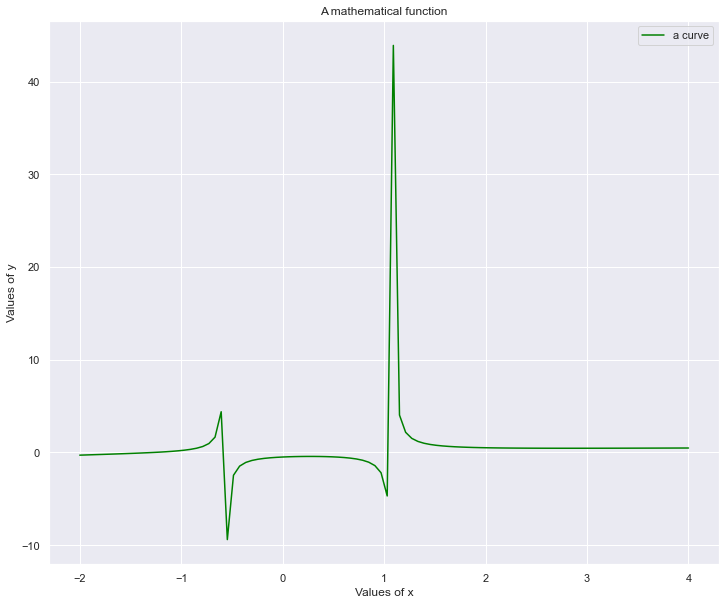

In [35]:
# Slightly prettier plot

plt.figure()

# Defining the plot title, x and y labels
plt.title('A mathematical function')
plt.xlabel('Values of x')
plt.ylabel('Values of y')

# Plots the curve, and displays the legend
plt.plot(x, y, label = 'a curve', color = 'green') # here 'go-' stands for "green line, round points and full line"
plt.legend()

# Saving the figure as pdf and disolaying it in the notebook
plt.savefig('simple_plot.pdf', dpi=300)
plt.show()

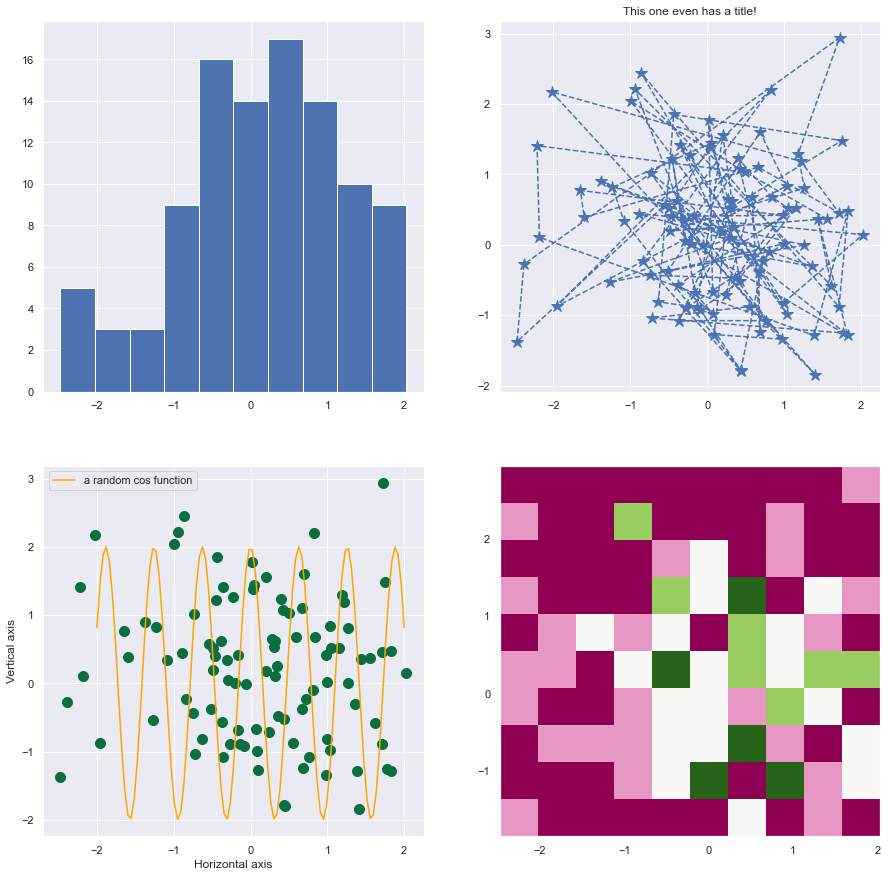

In [36]:
# A more advanced way of plotting things
data = np.random.randn(2, 100) # we generate a 2x100 matrix of random numbers from normal distribution

# Here we define a grid of figures and the types of plots that we create
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].hist(data[0]) # histogram plot - displays frequency of the data's first column
axs[0, 0].grid(True) # adding a grid to the first plot

axs[1, 0].scatter(data[0], data[1], color = "#0B6E40", s=100) # scatter plot where x and y values are elements of the two columns from data
# We also changed the color of the points from the default blue to a color of choice, referring to its HEX code
axs[1, 0].set_xlabel('Horizontal axis')
axs[1, 0].set_ylabel('Vertical axis')

# We can add an additional line to the plot
col_a = np.linspace(-2,2,100)
col_b = 2*np.cos(col_a*10)
axs[1,0].plot(col_a, col_b, label = 'a random cos function', c='orange')
axs[1,0].legend()

axs[0, 1].plot(data[0], data[1], linestyle='dashed', marker='*', markersize=12) 
# Line plot of the same thing - lines connect consecutive points in x and y columns
# Here connect the points with dashed lines
axs[0, 1].title.set_text('This one even has a title!')

axs[1, 1].hist2d(data[0], data[1], cmap = "PiYG") # 2D histogram with a custom color map


plt.show()

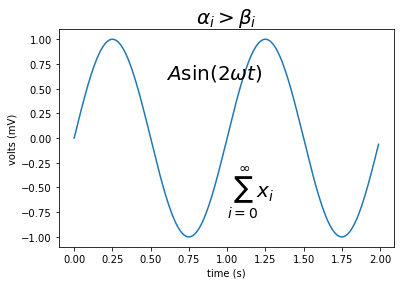

In [7]:
# Using text boxes in figures
# Including Greek letters, and mathematical formulas
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t) # np contains trigonometry functions, as well

plt.plot(t,s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$A\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

# Python Seaborn Tutorial for Beginners

## What is Seaborn?

- Python Data Visualization Library - based on Matplotlib (see previous tutorial)
- Used for plotting statistical graphs, identifying trends, relationships & outliers
- Seaborn is easier & faster to use (less code) Vs Matplotlib

## Tutorial Overview

- What is matplotlib and how/why it's used

- Trend Plots:
    - Line Plots
    
- Summary Plots:
    - Bar Plots
    
- Distribution of Data:
    - Histogram
    - Box Plots
    
- Relationship Plots
    - Scatter Plots
    - lmplot (combo of regplot() and FacetGrid)
    
- Holistic views / Combo:
    - Sub Plots
    - Pair Plots
    - Join Plots
    
- Correlation / Relationships:
    - Heat Maps

## Tutorial Overview by video (from the author, see link above!)


### Video 1:
1. What is matplotlib and how/why it's used
2. Line Plots
3. Bar Plots
4. Histogram

### Video 2:
5. Box Plots
6. Scatter Plots
7. lmplot (combo of regplot() and FacetGrid)

### Video 3:
8. Sub Plots
9. Pair Plots
10. Join Plots
11. Heat Maps

## Importing / Installing packages



In [7]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading the Raw Data


In [8]:
# Loading the data

raw_data = pd.read_csv('https://raw.githubusercontent.com/Teoroo-CMC/DoE_Course_Material/main/Week_1/Workshop_2/marketing_raw_data.csv', index_col = 0, on_bad_lines='skip')

# runs all the data
raw_data

print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(182, 10)


Week  Week_ID  Month  Month_ID  Year   Day_Name  Visitors  \
Date                                                                    
09/11/2020    46       34     11        11  2020     Monday       707   
10/11/2020    46       34     11        11  2020    Tuesday      1455   
11/11/2020    46       34     11        11  2020  Wednesday      1520   
12/11/2020    46       34     11        11  2020   Thursday      1726   
13/11/2020    46       34     11        11  2020     Friday      2134   

            Revenue  Marketing Spend           Promo  
Date                                                  
09/11/2020      465          651.375        No Promo  
10/11/2020    10386         1298.250   Promotion Red  
11/11/2020    12475         1559.375  Promotion Blue  
12/11/2020    11712         1801.750        No Promo  
13/11/2020    10000         2614.500        No Promo

## 2. Line Graph

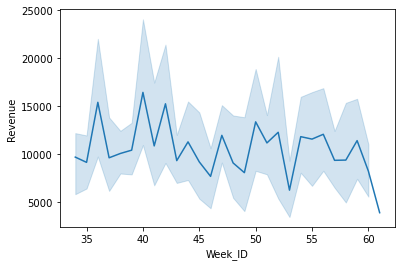

In [9]:
# Example 1 - Simple 1 line graph
# Assuming we want to investigate the Revenue by Date

ax = sns.lineplot(x='Week_ID', y='Revenue', data = raw_data)

# Notes: error bands show the confidence interval

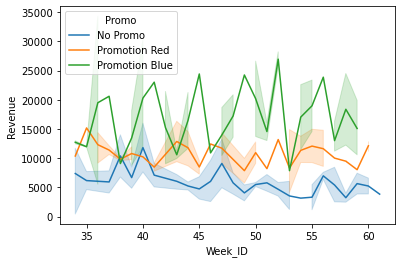

In [10]:
# Example 2 - Adding Categories

# By Promo
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', data = raw_data)


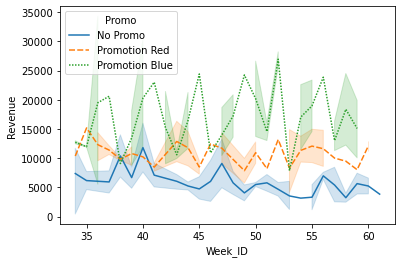

In [11]:
# Example 3 - By Promo with style
ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data)

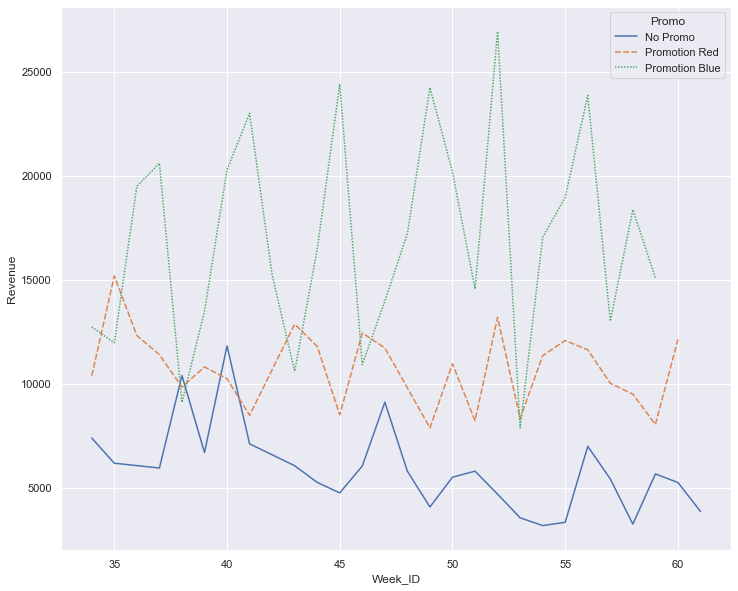

In [12]:
# Example 4 - By Promo with style & Increase the size & Remove error bars

# increase the size
sns.set(rc={'figure.figsize':(12,10)})


ax = sns.lineplot(x='Week_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, ci=None)

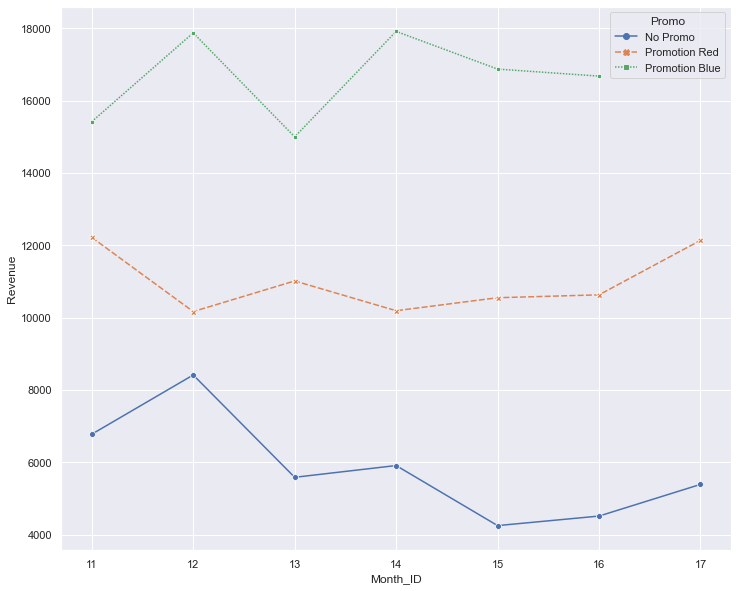

In [13]:
# Example 5 - By Promo with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Promo', style = 'Promo', data = raw_data, ci=None,  markers=True)

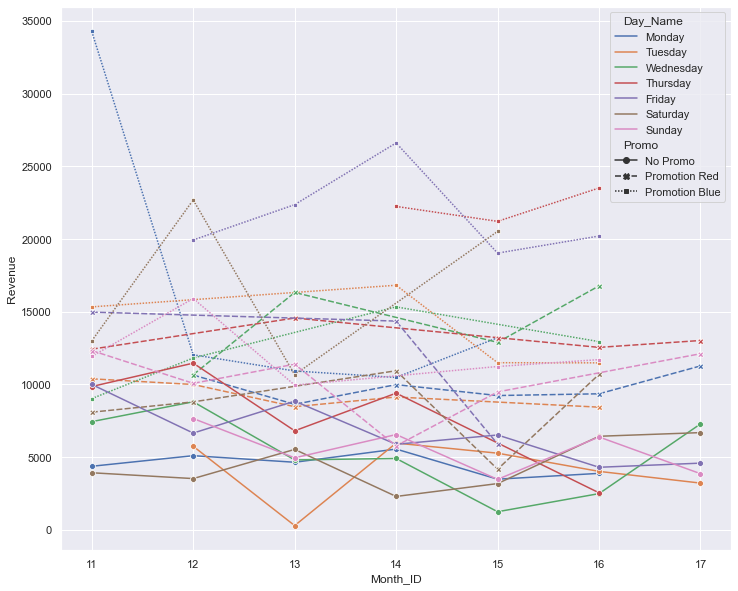

In [14]:
# Example 6 - By Day_Name with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Month_ID', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, ci=None,  markers=True)

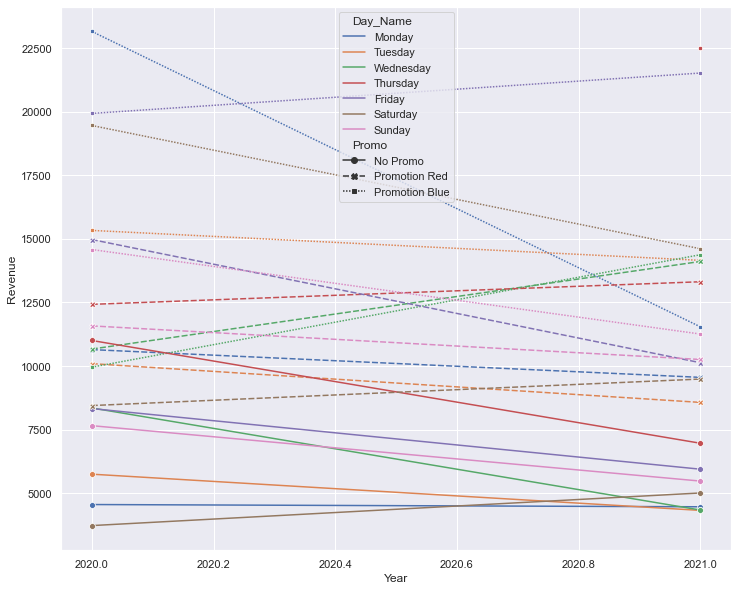

In [15]:
# Example 7 - By Year with style & Increase the size & Remove error bars & adding markers & by month

ax = sns.lineplot(x='Year', y='Revenue', hue = 'Day_Name', style = 'Promo', data = raw_data, ci=None,  markers=True)

### LinePlot Documentation

Here you can find everything (or most of it at least) that you need to know about the 'lineplot' function in Seaborn.

https://seaborn.pydata.org/generated/seaborn.lineplot.html 

## 3. Bar Plots

Month_ID       Revenue
0        11  11255.454545
1        12  11667.806452
2        13   9588.516129
3        14  10683.892857
4        15  10555.354839
5        16  10806.500000
6        17   7636.000000

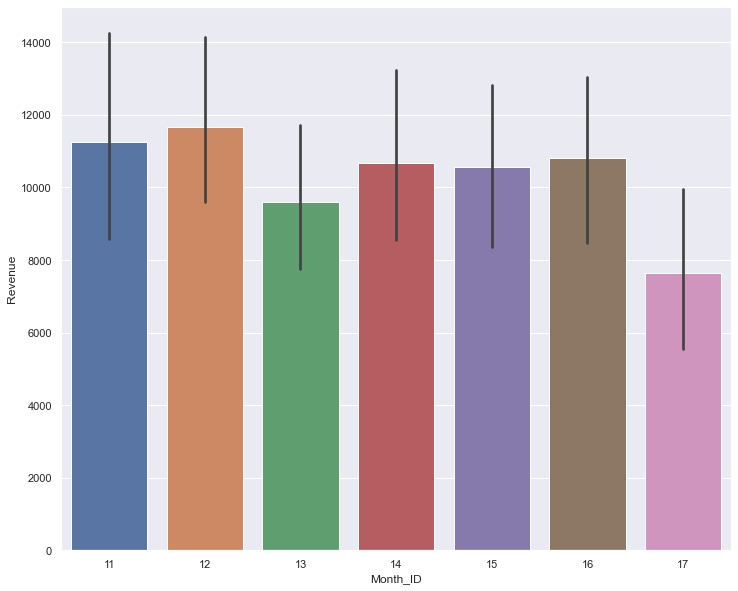

In [16]:
# Example 1 - Total Revenue by Month

ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data)

# Notes: 
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['Month_ID', 'Revenue', 'Visitors']].groupby('Month_ID', as_index = False).agg({'Revenue':'mean'})

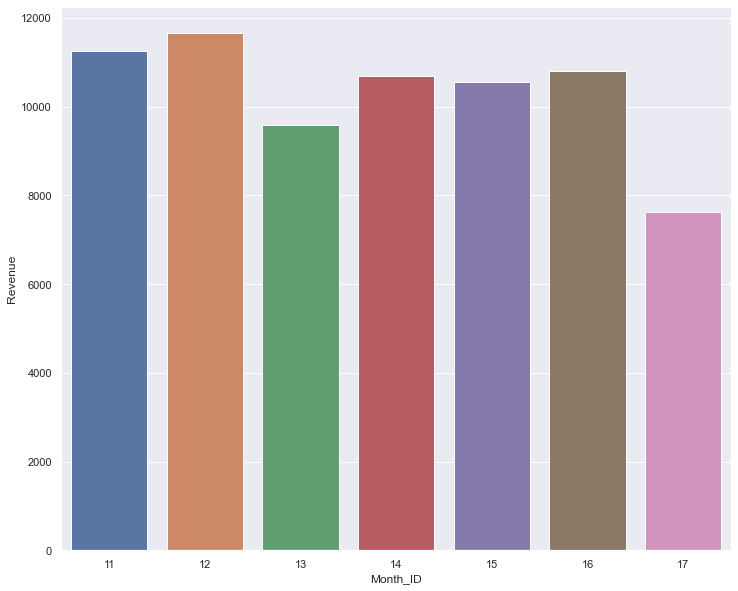

In [17]:
# Example 2 - Total Revenue by Month - Remove the Confidence Interval
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, ci=False)

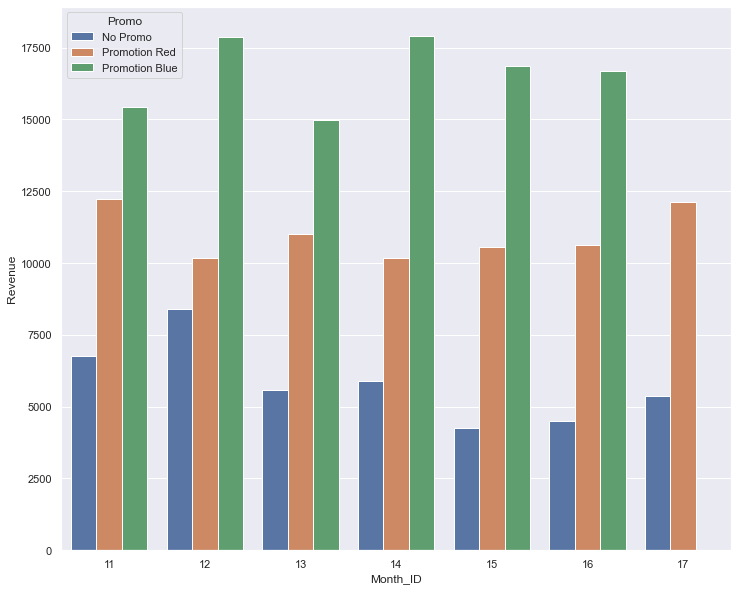

In [18]:
# Example 3 - Total Revenue by Month - Remove the Confidence Interval - By Promo
ax = sns.barplot(x="Month_ID", y="Revenue", data=raw_data, ci=False, hue = 'Promo')

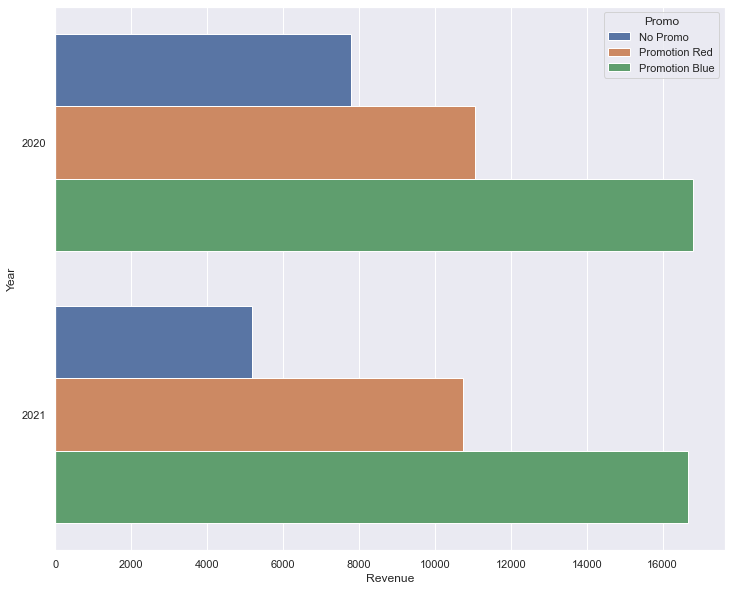

In [19]:
# Example 4 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction
ax = sns.barplot(x="Revenue", y="Year", ci=False, hue = 'Promo', orient = 'h', data=raw_data)


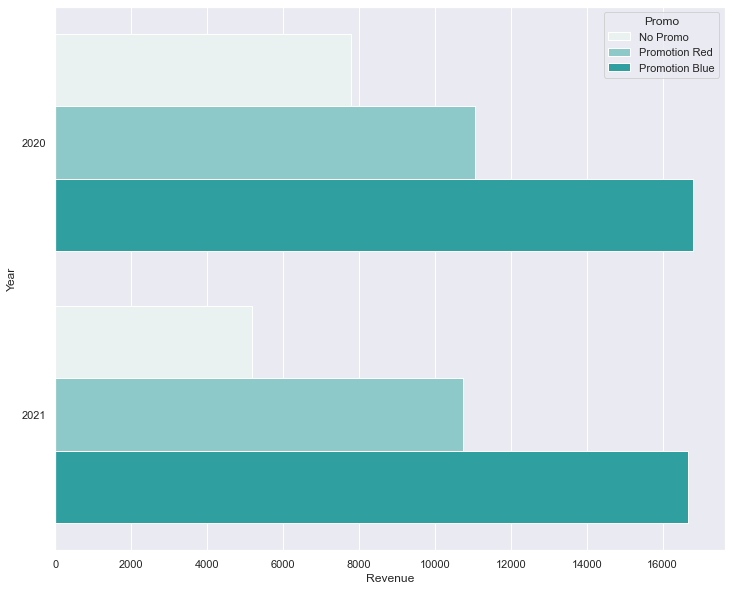

In [20]:
# Example 5 - Total Revenue by Month - Remove the Confidence Interval - By Promo - Changing direction - Changing Colour
ax = sns.barplot(x="Revenue", y="Year", ci=False, hue = 'Promo', orient = 'h', data=raw_data, color="#1CB3B1")

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/


## 4. Histograms

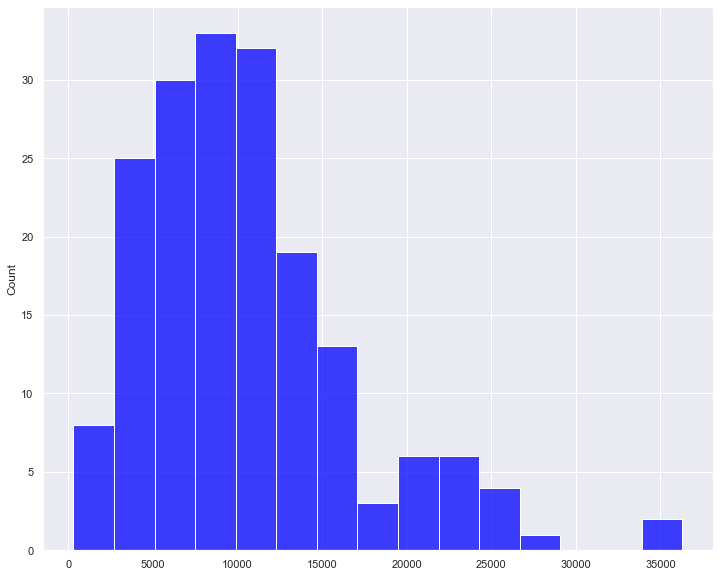

In [21]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

sns.histplot(x, color = 'blue');

# As you can see, it's a bit imbalance. Right skewd distribution as the mean is to the right

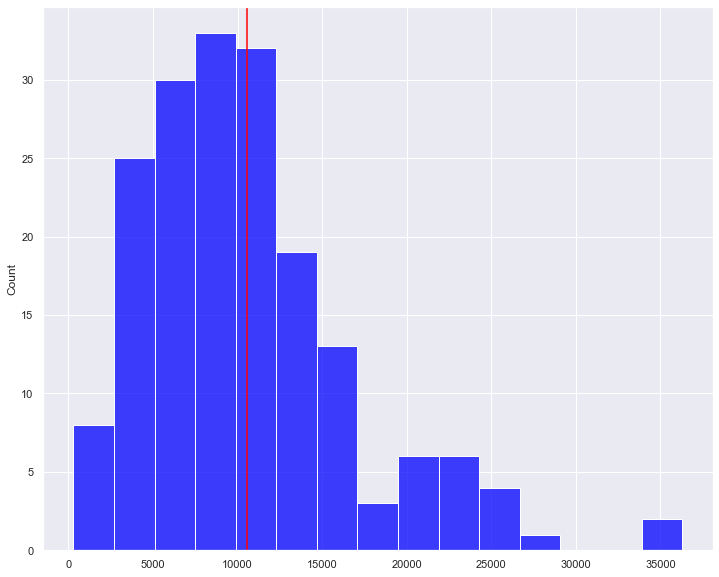

In [50]:
# Example 2 - Investigating the distribution of Revenue, adding the mean

x = raw_data['Revenue'].values

sns.histplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['Revenue'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

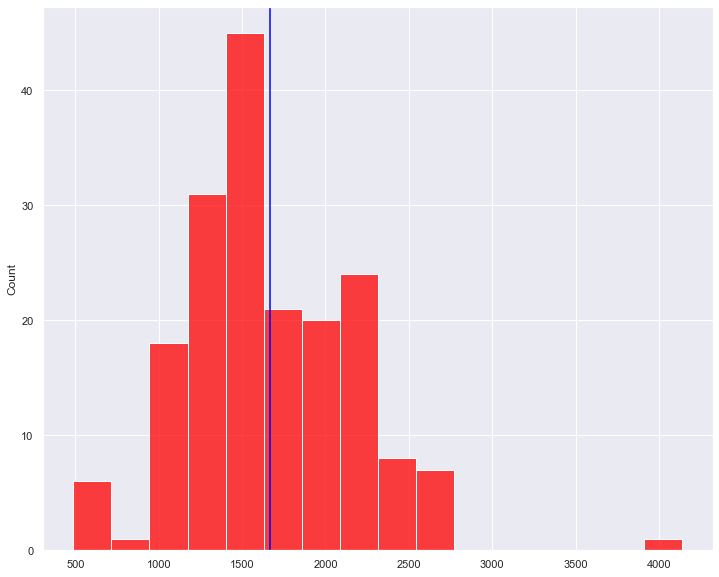

In [52]:
# Example 3 - Investigating the distribution of Visitors, adding the mean

x = raw_data['Visitors'].values

sns.histplot(x, color = 'red');

# Calculating the mean
mean = raw_data['Visitors'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'blue')

## 5. Box Plots

The meadian is:  9452.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


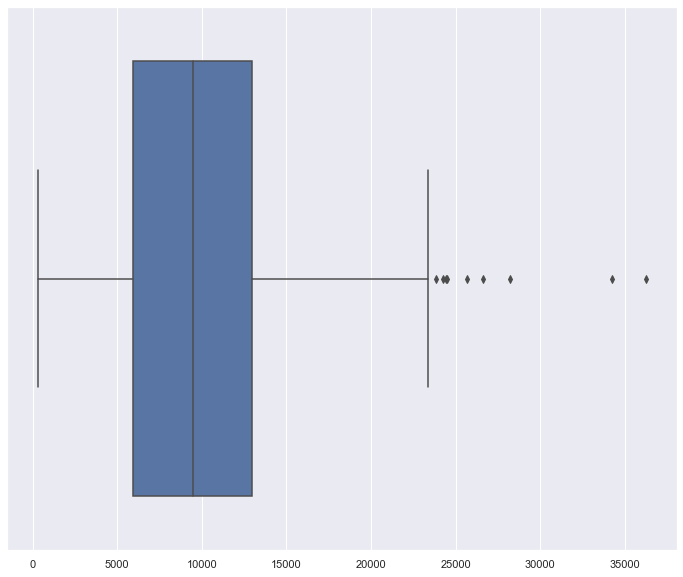

In [53]:
# Example 1 - Investigating the distribution of Revenue

x = raw_data['Revenue'].values

ax = sns.boxplot(x)

print('The meadian is: ', raw_data['Revenue'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

#### More Details
More details here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
Credits: Michael Galarnyk


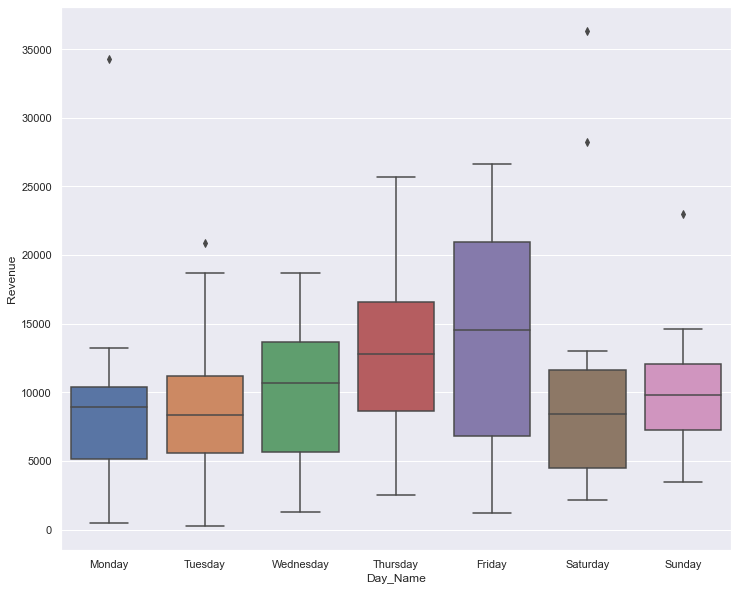

In [54]:
# Example 2 - Investigating the distribution of Revenue by Day

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data)

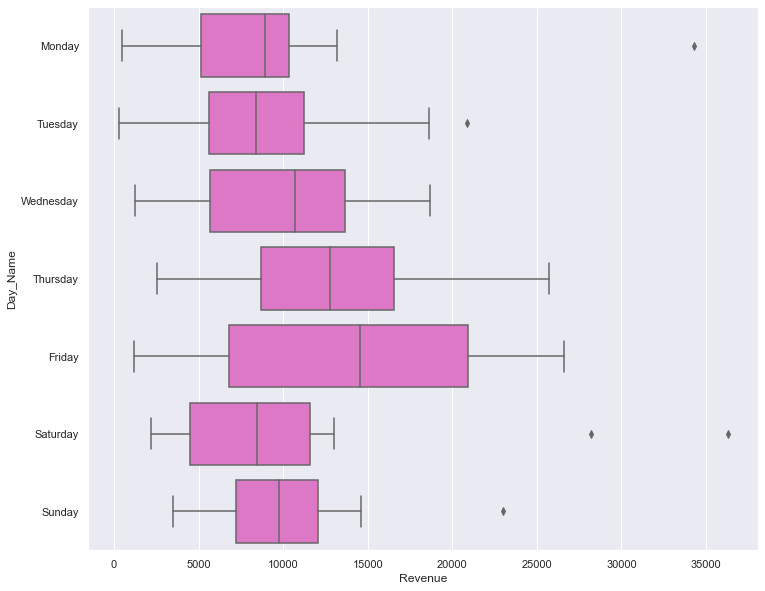

In [55]:
# Example 3 - Investigating the distribution of Revenue by Day - Horizontal - change color

ax = sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#EE67CF')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

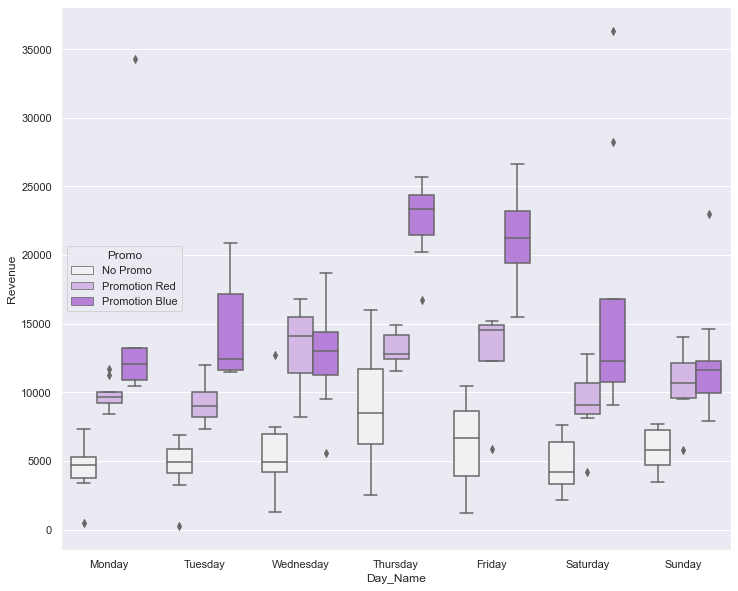

In [56]:
# Example 4 - Investigating the distribution of Revenue by Day - changing color - adding hue

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color="#B971E7", hue = 'Promo')

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

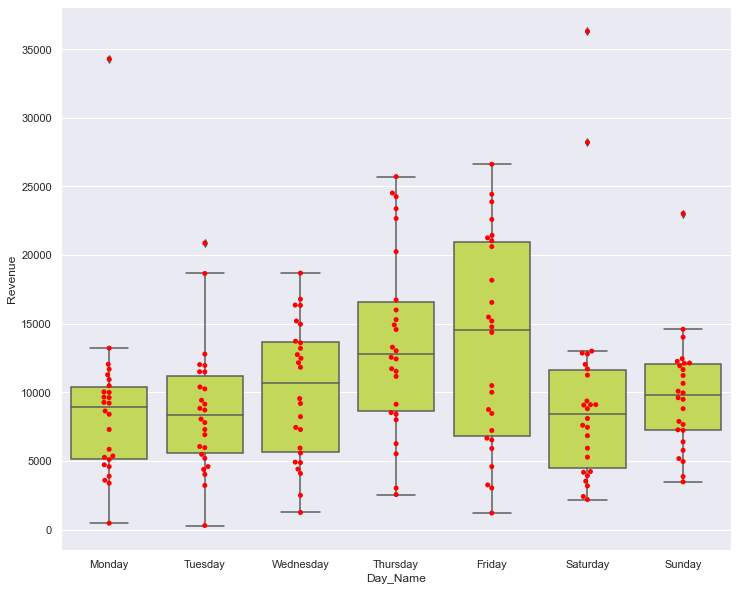

In [57]:
# Example 5 - Investigating the distribution of Revenue by Day - by color - by data points

ax = sns.boxplot(x="Day_Name", y="Revenue", data=raw_data, color = '#D1EC46')
ax = sns.swarmplot(x="Day_Name", y="Revenue", data=raw_data, color="red")

### More on Boxplots here:
https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

## 6. ScatterPlots

In [58]:
raw_data.columns

Index(['Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name', 'Visitors',
       'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

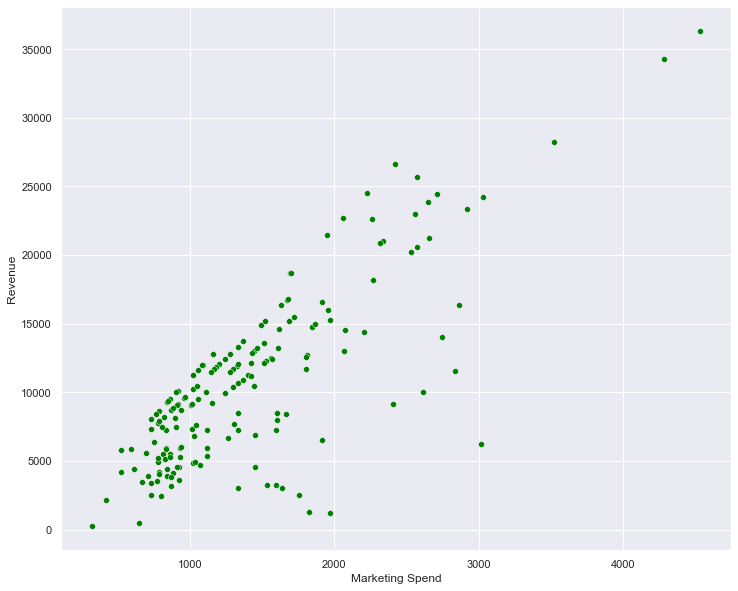

In [59]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green')

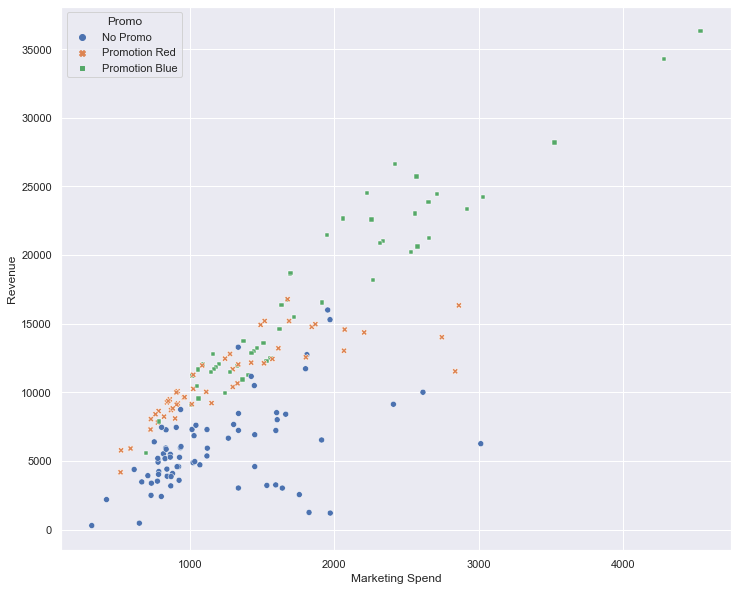

In [60]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', style = 'Promo')

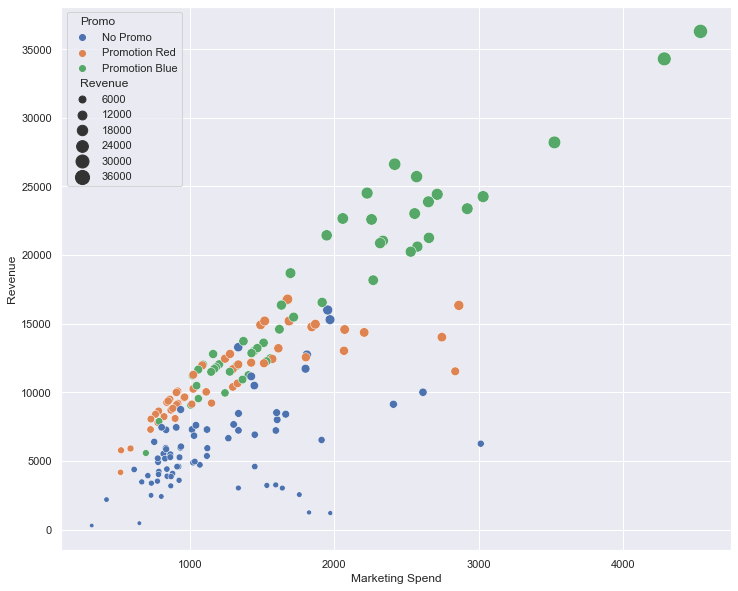

In [61]:
# Example 3 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size

ax = sns.scatterplot(x="Marketing Spend", y="Revenue", data=raw_data, color = 'green', hue = 'Promo', size = 'Revenue',
                    sizes=(20, 200))

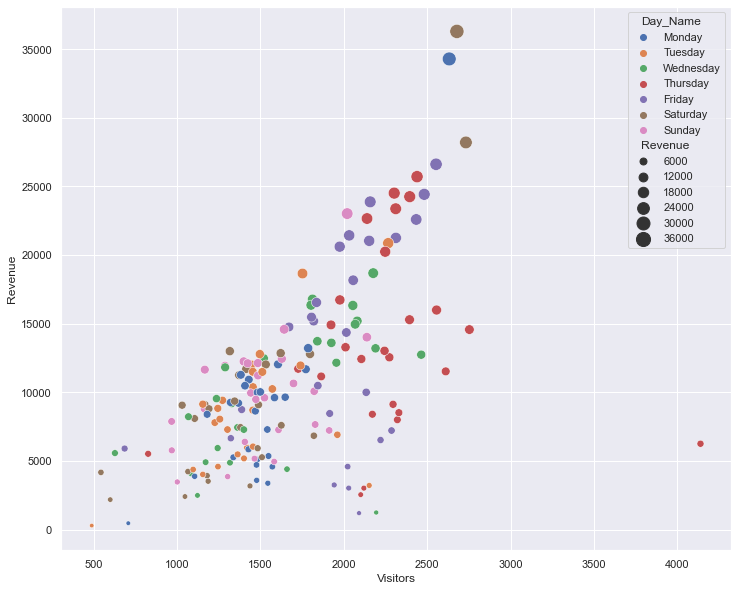

In [62]:
# Example 4 - Relationship between Marketing Spend and Revenue - changing color & hue - adding size - by day

ax = sns.scatterplot(x="Visitors", y="Revenue", data=raw_data, color = 'green', hue = 'Day_Name', size = 'Revenue',
                    sizes=(20, 200))

## 7. lmPlots

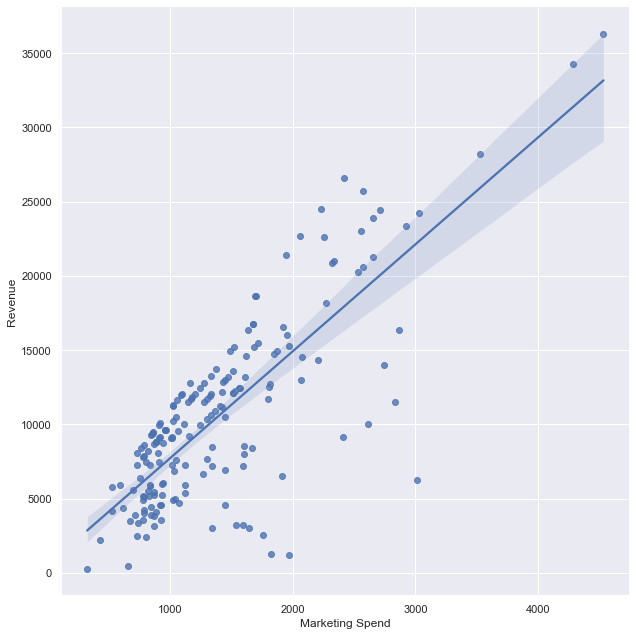

In [63]:
# Example 1 - Relationship between Marketing Spend and Revenue

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, height=9)

# Notes:
# What is Linear Regression: It is a predictive statistical method for modelling the relationship between x (independent variable) & y (dependent V).
# How it works (cost function MSE): https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220

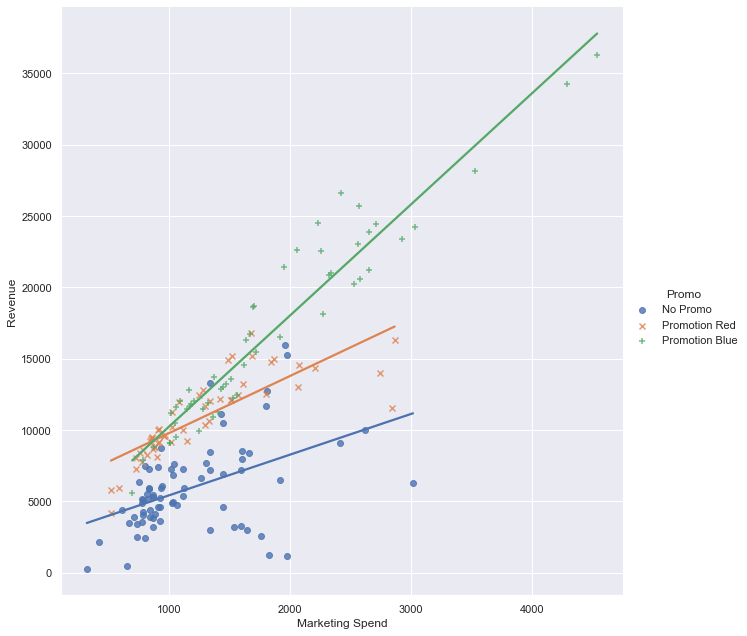

In [64]:
# Example 2 - Relationship between Marketing Spend and Revenue - changing color, hue & Style

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, hue = 'Promo', ci= False, height=9, markers=["o", "x", "+"])

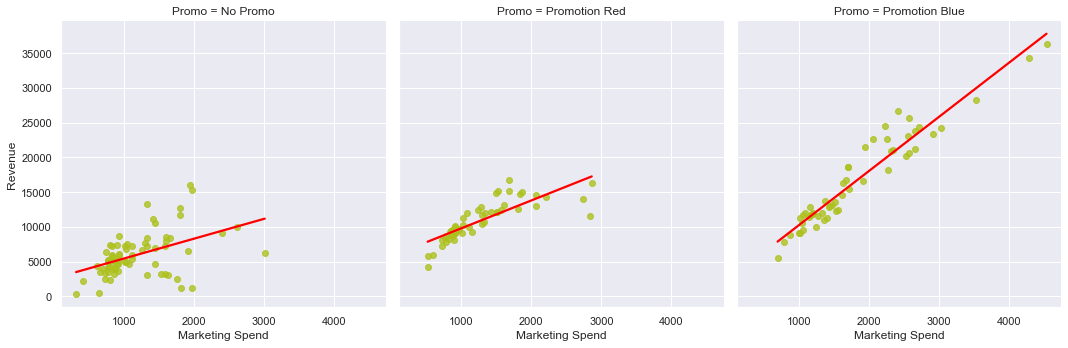

In [65]:
# Example 3 - Relationship between Marketing Spend and Revenue - by column

ax = sns.lmplot(x="Marketing Spend", y="Revenue", data=raw_data, col = 'Promo', ci= False, height=5, 
                line_kws={'color': 'red'}, 
                scatter_kws={'color':'#ADC11E'})

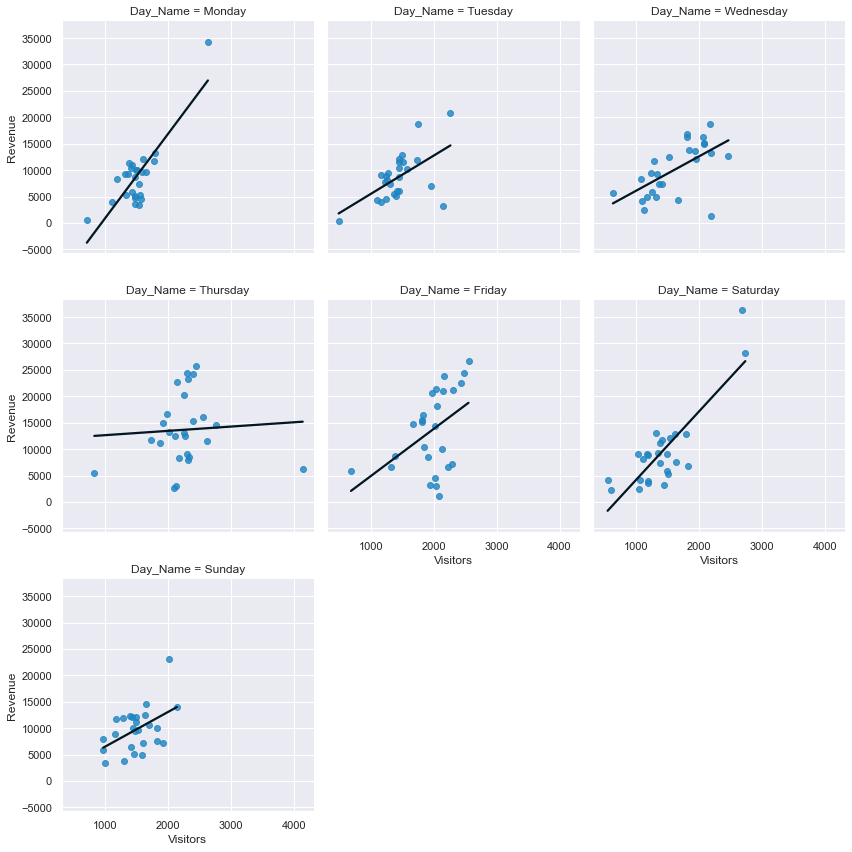

In [66]:
# Example 4 - Relationship between Marketing Spend and Revenue - by column - by day - add Jitter too

ax = sns.lmplot(x="Visitors", y="Revenue", data=raw_data, col = 'Day_Name', ci= False, height=4, 
                line_kws={'color': '#031722'}, 
                scatter_kws={'color':'#1E84C1'},
               col_wrap=3,
               x_jitter=.3)

## 8. SubPlots

<AxesSubplot:xlabel='Revenue', ylabel='Day_Name'>

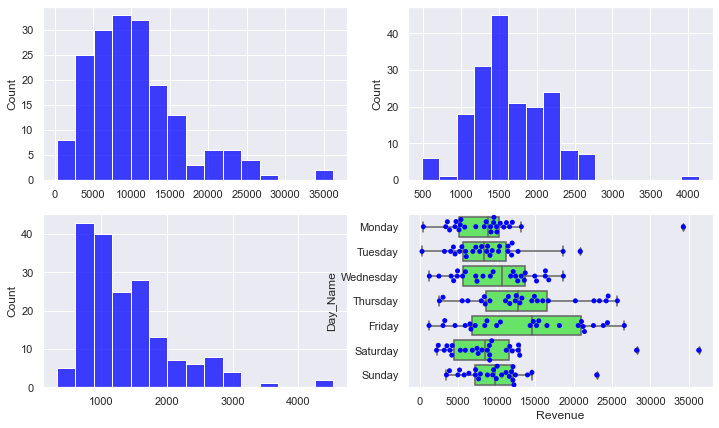

In [24]:
# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = raw_data['Revenue'].values
b = raw_data['Visitors'].values
c = raw_data['Marketing Spend'].values


# plot 1
sns.histplot(a, color = 'blue', ax=axes[0,0])

# plot 2
sns.histplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.histplot(c, color = 'blue', ax=axes[1,0])

# plot 4
sns.boxplot(x="Revenue", y="Day_Name", data=raw_data, color = '#52F954', ax=axes[1,1])
sns.swarmplot(x="Revenue", y="Day_Name", data=raw_data, color="blue", ax=axes[1,1])

## 9. Pairplots

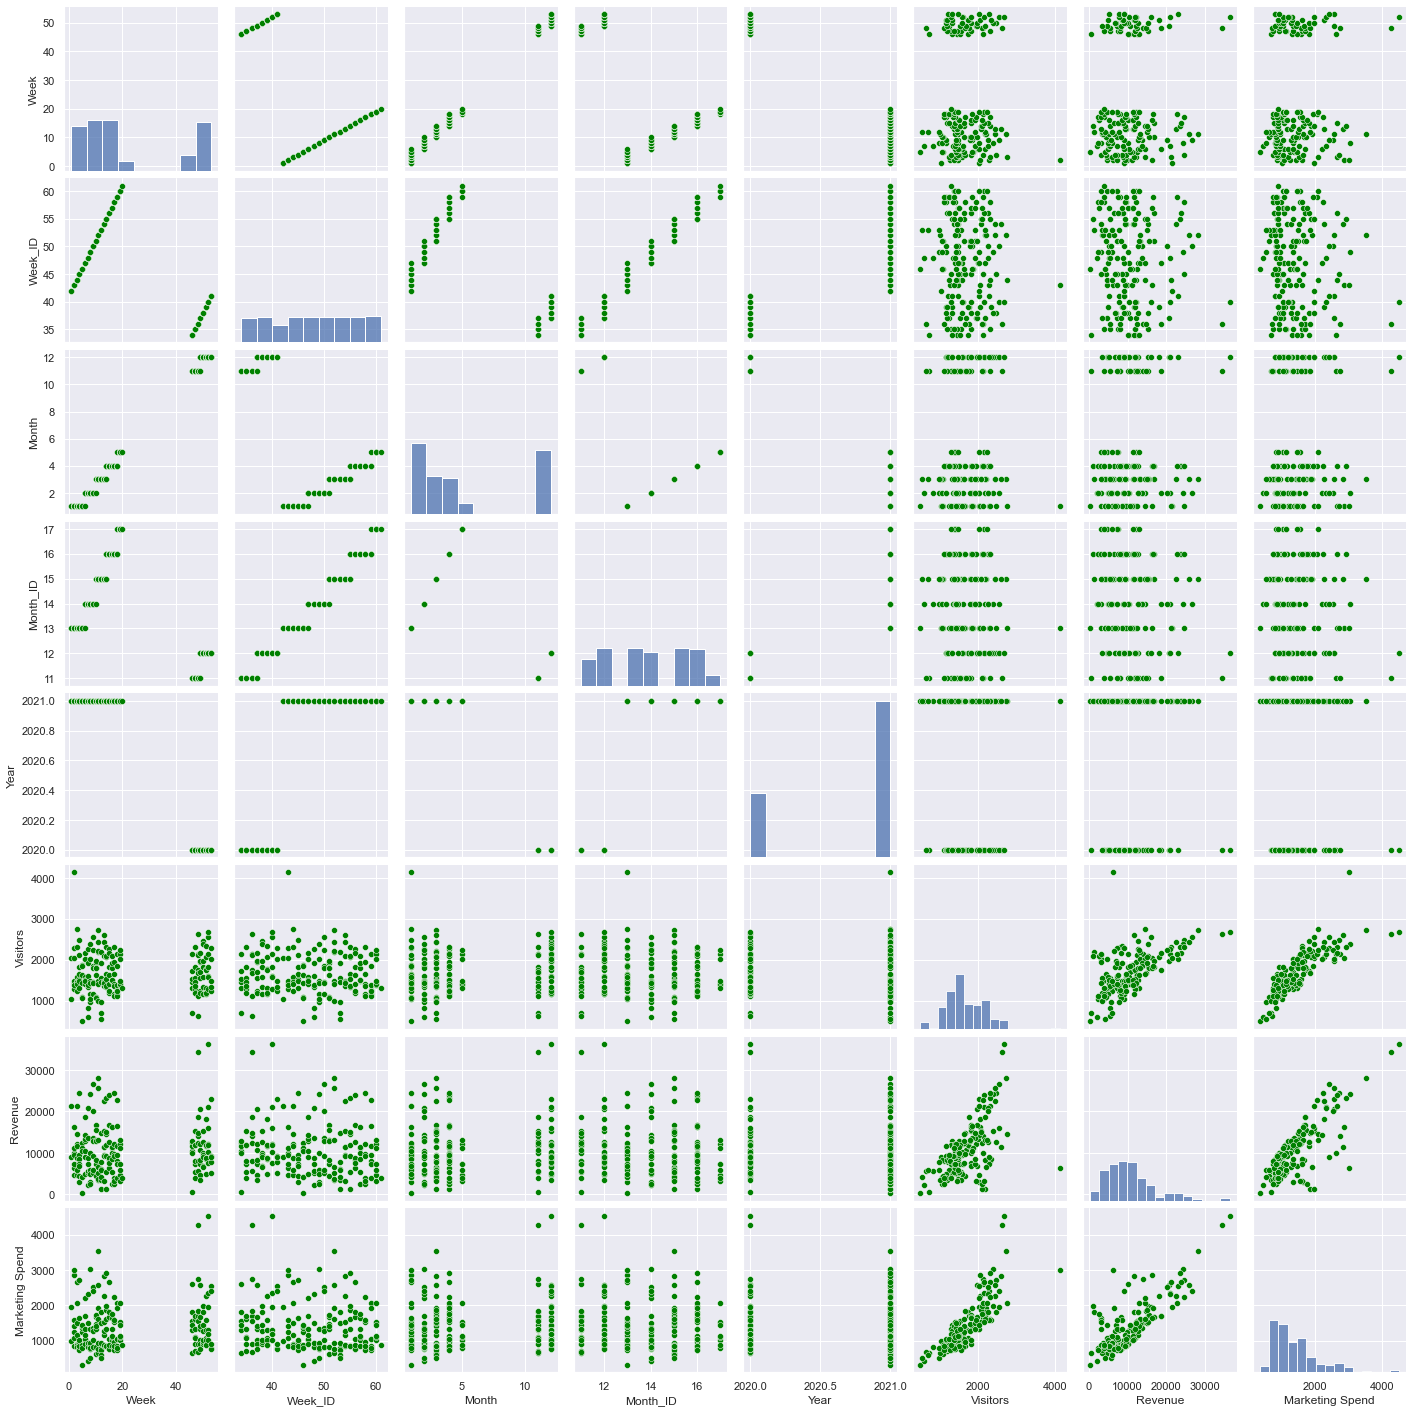

In [25]:
# Example 1 - running on all dataframe - green color
g = sns.pairplot(raw_data, plot_kws={'color':'green'})


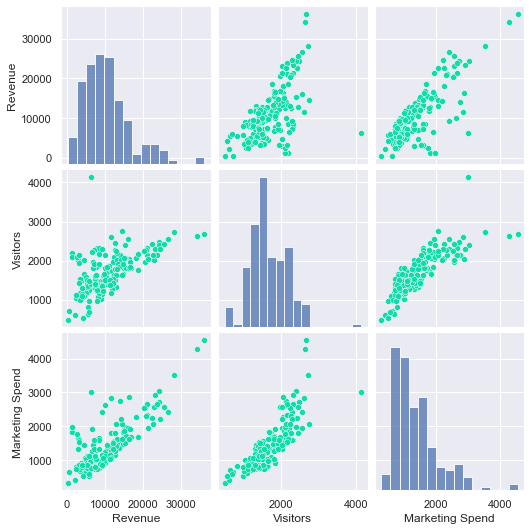

In [26]:
# Example 2 - running on specific columns - green color
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend']], plot_kws={'color':'#0EDCA9'})

# Cool Way to pick colours
# https://htmlcolorcodes.com/color-picker/

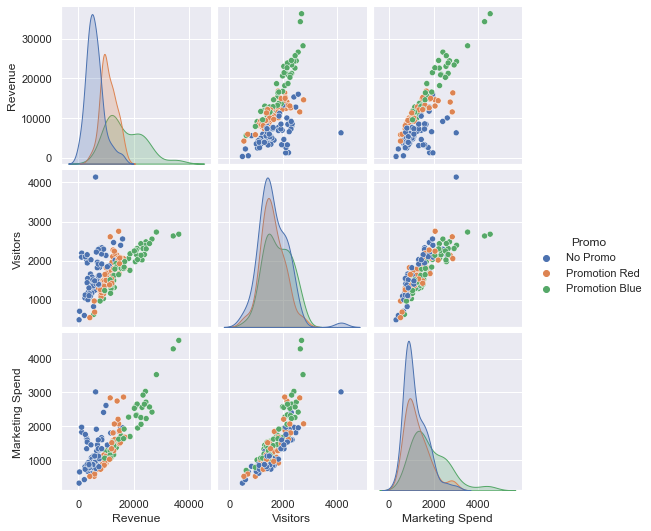

In [27]:
# Example 3 - running on specific columns - adding hue
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo')


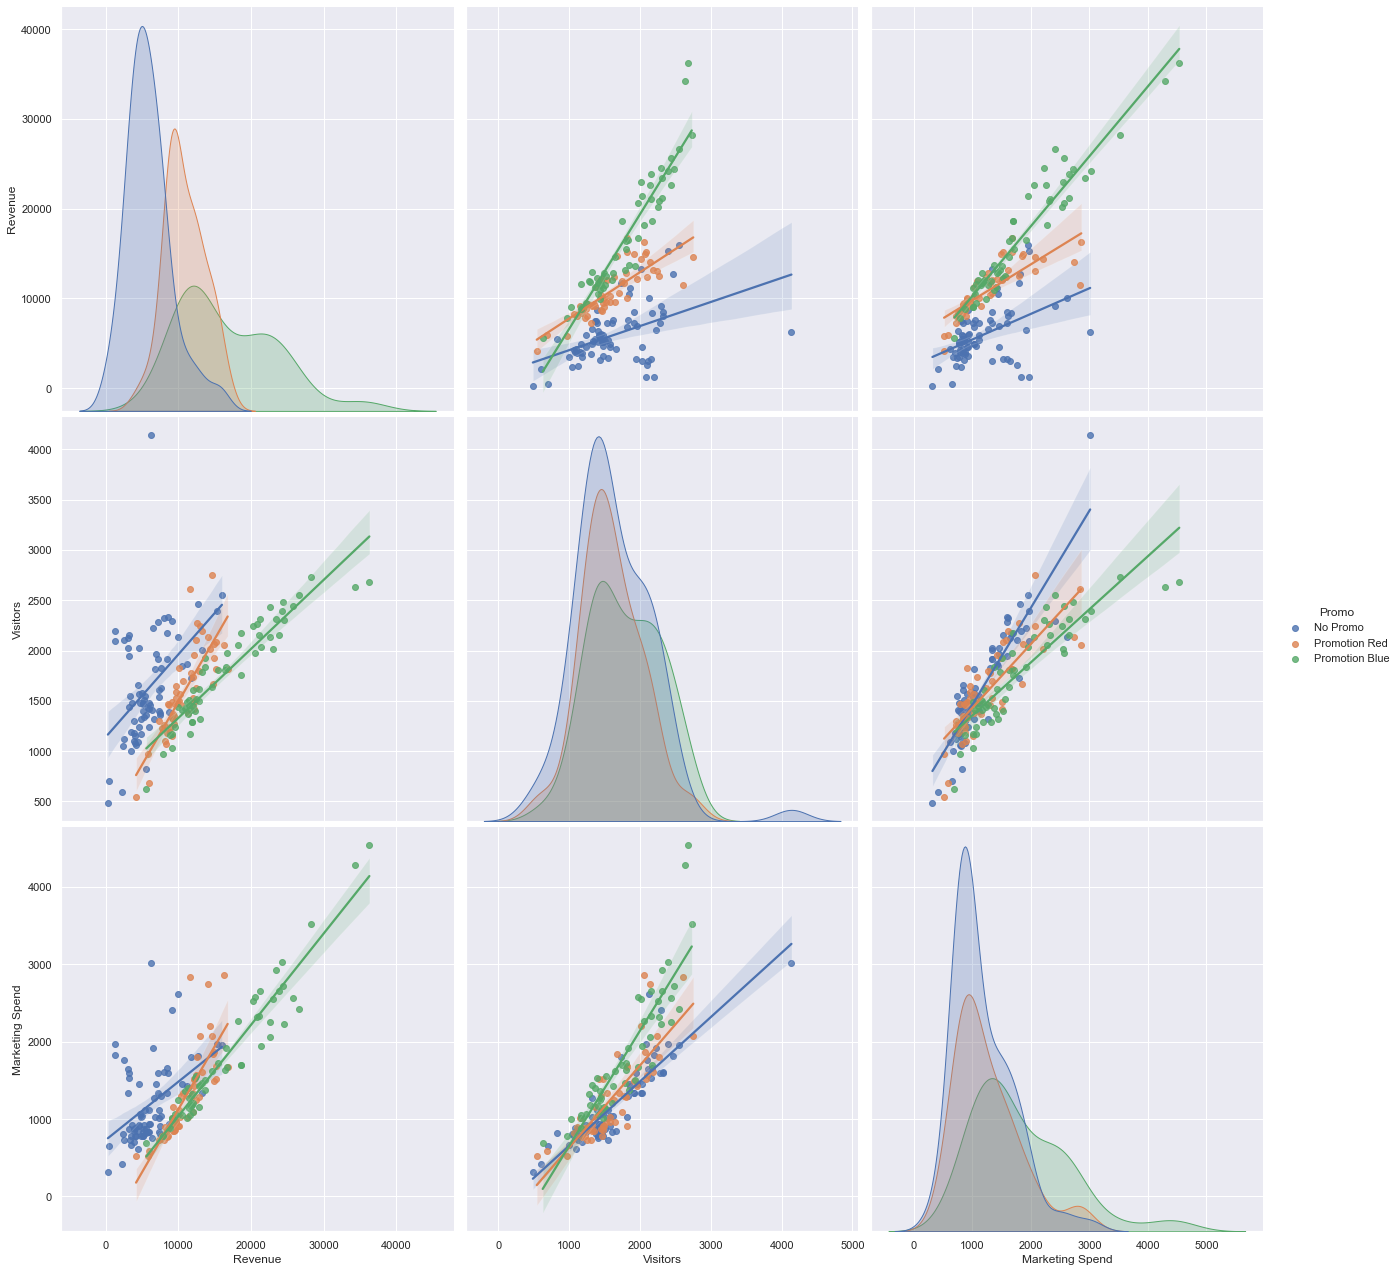

In [28]:
# Example 4 - running on specific columns - adding hue - adding kind = reg
g = sns.pairplot(raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']], hue = 'Promo', kind="reg", height = 6)


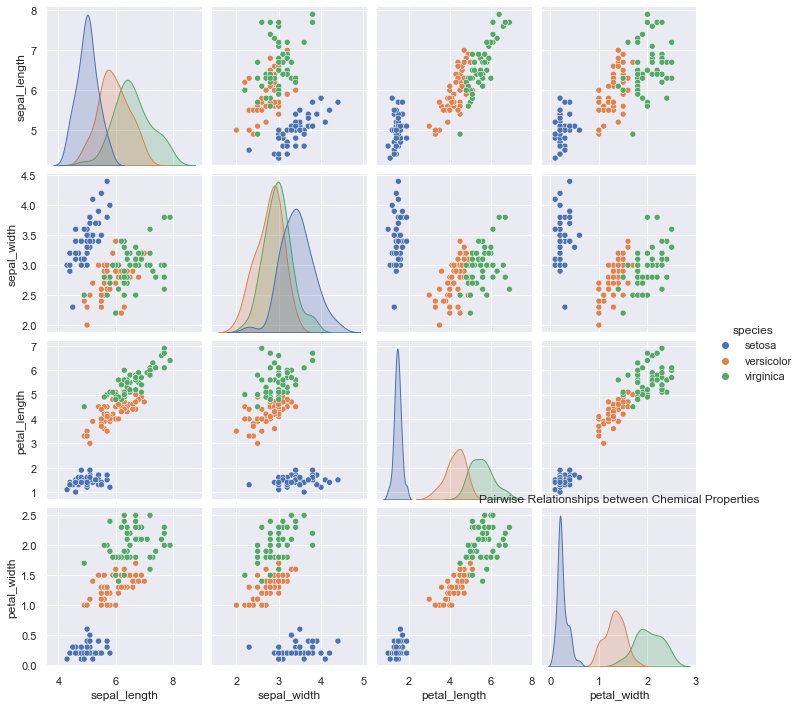

In [23]:
# Sample dataset of chemical properties
data = sns.load_dataset('iris')

# Create a pair plot
sns.pairplot(data, hue='species')

# Add labels and title
plt.title('Pairwise Relationships between Chemical Properties')

# Display the plot
fig = plt.gcf()
#fig.savefig(plot_folder + "sns_pair_plot.png")
plt.show()

In [25]:
### More on Pairplots:
https:\\seaborn.pydata.org\generated\seaborn.pairplot.html

SyntaxError: unexpected character after line continuation character (Temp/ipykernel_18172/3729754953.py, line 2)

## 10. JoinPlots
#### Draw a plot of two variables with bivariate and univariate graphs.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


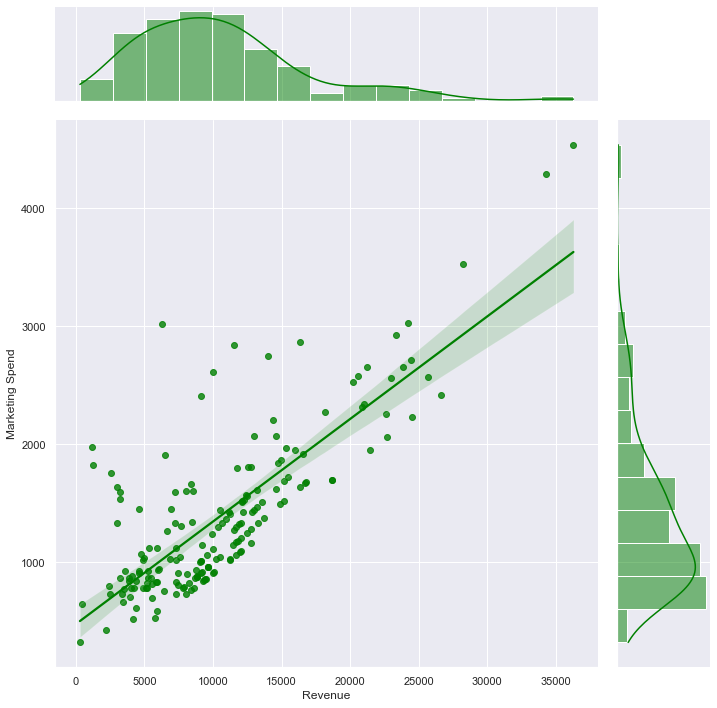

In [26]:
# Example 1 - Revenue vs marketing Spend Relationship with 
g = sns.jointplot("Revenue", "Marketing Spend", data=raw_data, kind="reg", color = 'green', height = 10)

## 11. Heat Map

In [ ]:
# First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
# .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
# The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
# More Info here: https://statisticsbyjim.com/basics/correlations/

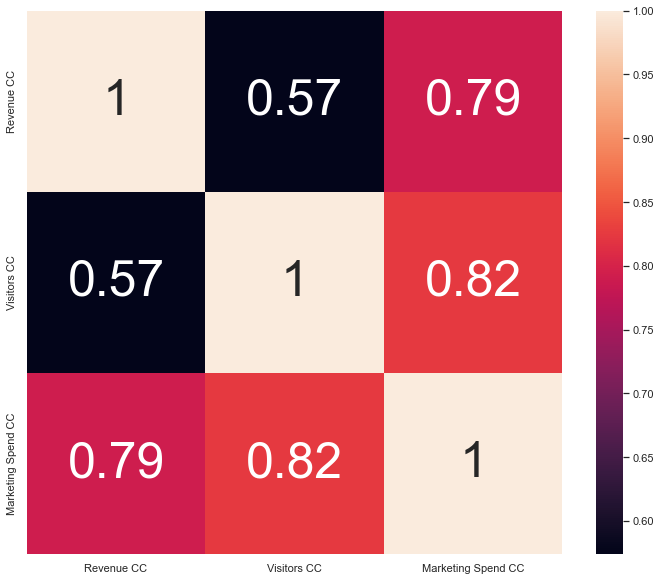

In [27]:
# Example 1 - Heatmap for PC

pc = raw_data[['Revenue','Visitors','Marketing Spend', 'Promo']].corr(method ='pearson')

cols = ['Revenue CC','Visitors CC','Marketing Spend CC']

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50})


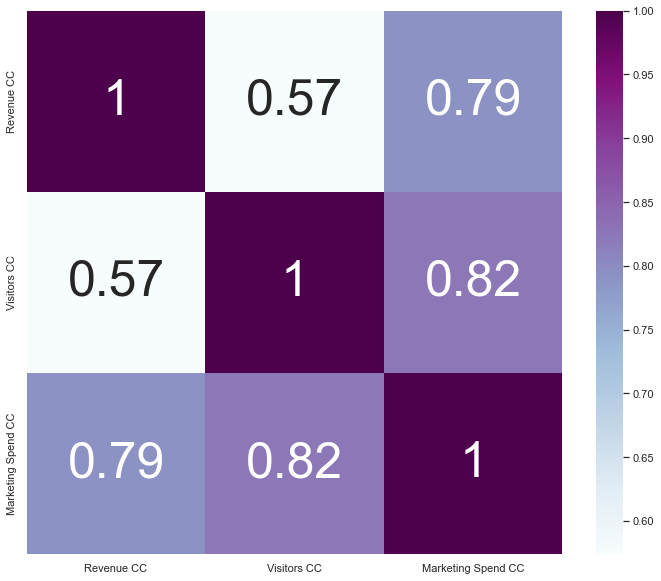

In [28]:
# Example 2 - Heatmap for PC - changing cmap

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size': 50},
                 cmap="BuPu")

# Examples:
# cmap="YlGnBu"
# cmap="Blues"
# cmap="BuPu"
# cmap="Greens"

### More details for Heatmaps here:
https://seaborn.pydata.org/generated/seaborn.heatmap.html

### Violin plots

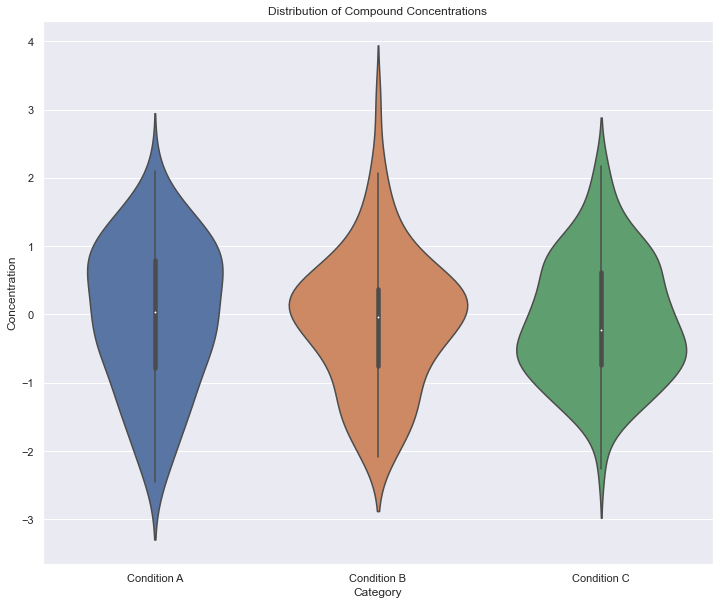

In [31]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset of chemical compound concentrations across different categories
categories = ['Condition A', 'Condition B', 'Condition C']
data = {
    'Category': categories * 100,
    'Concentration': np.random.randn(300)
}

# Create a violin plot
sns.violinplot(x='Category', y='Concentration', data=data)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Concentration')
plt.title('Distribution of Compound Concentrations')

# Display the plot
fig = plt.gcf()
#fig.savefig(plot_folder + "sns_violin.png")
plt.show()

# Plotting using Plotly

In [38]:
import plotly.graph_objects as go

# Sample data
time = [1, 2, 3, 4, 5]
temperature = [25, 27, 29, 26, 28]

# Create the trace
trace = go.Scatter(
    x=time,
    y=temperature,
    mode='lines+markers',
    hovertemplate='Time: %{x}<br>Temperature: %{y}°C'
)

# Create the layout
layout = go.Layout(
    title='Temperature Measurements',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Temperature (°C)')
)

# Create the figure
fig = go.Figure(data=trace, layout=layout)

# Show the figure
fig.write_html("plotly_ex1.html")
plt.show()

In [41]:
import plotly.express as px
import pandas as pd

# Sample data
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [10, 15, 13, 17, 12],
    'color': [0.5, 0.8, 0.2, 0.9, 0.6]  # Third variable for color mapping
})

# Create the scatter plot
fig = px.scatter(data, x='x', y='y', color='color', color_continuous_scale='Viridis')

# Customize the layout
fig.update_layout(
    title='Scatter Plot with Color Mapping',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y')
)

# Show the scatter plot
fig.show()

In [42]:
import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[1, 5, 2, 2, 3],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[4, 3, 2.5, 1, 2],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 5]
    )),
  showlegend=False
)

fig.show()

In [43]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

import numpy as np

x,y = np.meshgrid(np.arange(-2, 2, .2),
                  np.arange(-2, 2, .25))
z = x*np.exp(-x**2 - y**2)
v, u = np.gradient(z, .2, .2)

# Create quiver figure
fig = ff.create_quiver(x, y, u, v,
                       scale=.25,
                       arrow_scale=.4,
                       name='quiver',
                       line_width=1)

# Add points to figure
fig.add_trace(go.Scatter(x=[-.7, .75], y=[0,0],
                    mode='markers',
                    marker_size=12,
                    name='points'))

fig.show()

In [44]:
import plotly.graph_objects as go

import pandas as pd

# Load data
df = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(df.Date), y=list(df.High)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

# fig.write_html(plot_folder + "plotly_range_slider.html")
fig.show()

## Final thoughts

Hopefully you've gotten a taste for the plethora of possibilities in plotting with various libraries. To learn more, you are strongly encouraged to check out the documentation pages for these libraries, which have excellent additional examples;

* Matplotlib; https://matplotlib.org/stable/tutorials/index
* Seaborn; https://seaborn.pydata.org/tutorial.html
* Plotly; https://plotly.com/python/